# Pymaceuticals Inc.
---

### Analysis

* Summary: From the following analysis, we can find the more effective drug regimens for tumors in mice, and find correlations between the mice and other factors.

* Conclusions:
    * As evident from the calculation of the outliers, from the 4 chosen treatment gorups (Capomulin, Ramicane, Infubinol and Ceftamin), there are virtually no outliers with the exception of one datapoint in the Infubinol drug regimen.
    * From the generated box plot, we can conclude that from the 4 chosen aforementioned treatment groups, Capomulin and Ramicane have the smallest distribution of tumor volume.
    * From observing one mouse that has undergone the Capomulin course of treatment, over the period of 40 days, there is a downward trend. Although, an ongoing observation of the mouse is still required as after approximately 35 days, the trend becomes postively sloping again.
    * Based on the drugs undergoing the Capomulin treatment, there is a positive correlation between weight and tumor volume.
 

In [264]:
# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame & format tumor volume to 1d.p
study_combined = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_combined.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [265]:
# Checking the number of mice.
mice_count = len(study_combined["Mouse ID"].unique())
mice_count

249

In [266]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_combined.duplicated(subset=["Mouse ID", "Timepoint"])
study_combined[duplicate_mice]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26

In [267]:
# Optional: Get all the data for the duplicate mouse ID. 
study_combined[study_combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26

In [268]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_clean = study_combined.drop_duplicates(subset=["Mouse ID", "Timepoint"])
study_clean.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [269]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(study_clean["Mouse ID"].unique())
mice_count_clean

249

## Summary Statistics

In [270]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [271]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary2 = pd.DataFrame({"Mean Tumor Volume": study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(),
                        "Median Tumor Volume": study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),
                        "Tumor Volume Variance": study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var(),
                        "Tumor Volume Std. Dev.": study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std(),
                        "Tumor Volume Std. Err.": study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()})

summary2

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.568014                0.525862  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

## Bar and Pie Charts

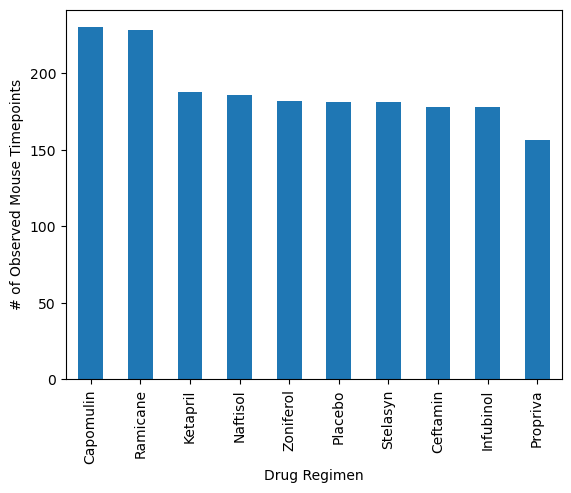

In [272]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panbar = study_clean.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False).plot(kind="bar")
panbar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

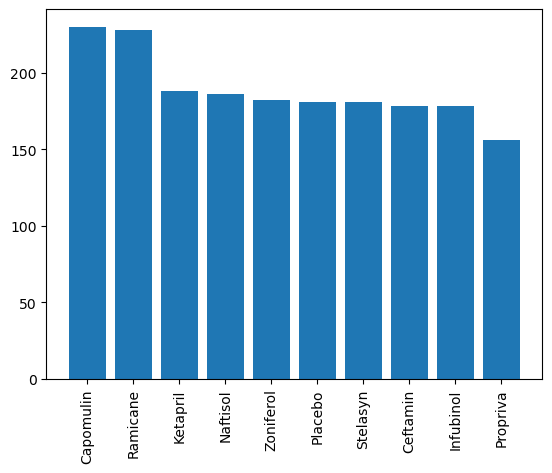

In [273]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
panbar = study_clean.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False).reset_index()
plt.bar(panbar["Drug Regimen"],panbar["Timepoint"])
plt.xticks(rotation=90)
plt.show()

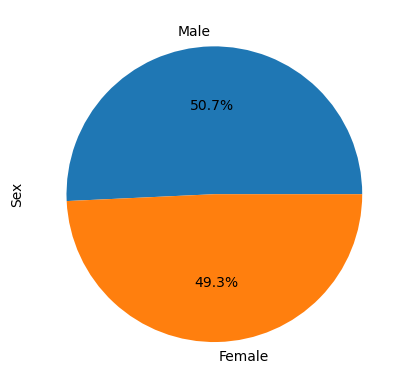

In [274]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
study_clean.groupby(["Sex"])["Sex"].count().sort_values(ascending=False).plot(kind="pie", autopct="%.1f%%")
plt.show()

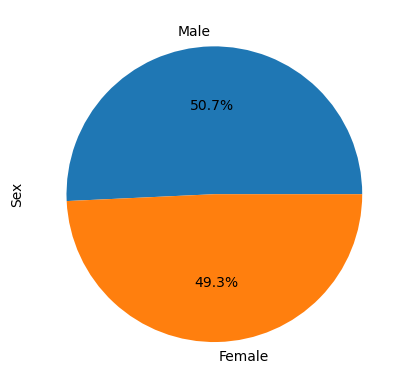

In [275]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
fem_count = len(study_clean[study_clean["Sex"]=="Female"])
male_count = len(study_clean[study_clean["Sex"]=="Male"])
data = [male_count, fem_count]
labels = ["Male", "Female"]
plt.pie(data, labels=labels, autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [283]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(study_clean, last_timepoint, how="inner", on=["Mouse ID", "Timepoint"])

In [277]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = {"Capomulin": [], 
            "Ramicane": [],
            "Infubinol": [],
            "Ceftamin": []}

outliers_list = {"Capomulin": [], 
            "Ramicane": [],
            "Infubinol": [],
            "Ceftamin": []}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_name:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    mask = final_tumor.loc[final_tumor["Drug Regimen"] == treatment]

    # Append list, tumor_list, with tumor volume data
    tumor_list_data = mask["Tumor Volume (mm3)"].tolist()
    tumor_list[treatment] = tumor_list_data
    
    # Grabbing list of volume data as a series to determine quartiles
    outliers_data = mask["Tumor Volume (mm3)"]

    # Calculate upper and lower bounds
    quartiles = outliers_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Detrmine outliers
    lower_data = mask.loc[mask["Tumor Volume (mm3)"] < lower_bound]
    lower_vol = lower_data["Tumor Volume (mm3)"].tolist()
    outliers_list[treatment] = lower_vol
    upper_data = mask.loc[mask["Tumor Volume (mm3)"] > upper_bound]
    upper_vol = upper_data["Tumor Volume (mm3)"].tolist()
    outliers_list[treatment].extend(upper_vol)

print(f"Potential outliers for each value are as follows: {outliers_list}")

Potential outliers for each value are as follows: {'Capomulin': [], 'Ramicane': [], 'Infubinol': [36.3213458], 'Ceftamin': []}


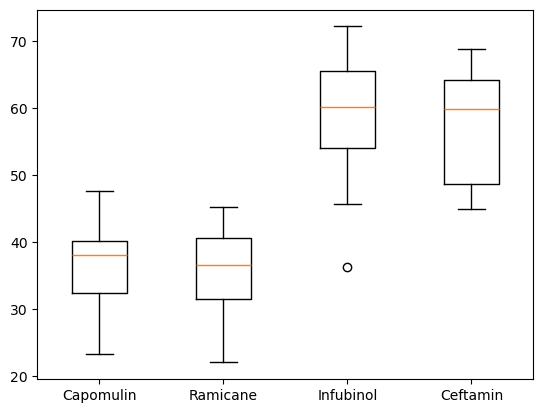

In [278]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# 'transpose' items to parallel key, value lists - taken from: https://stackoverflow.com/questions/47657651/boxplot-from-dictionary-with-different-length
labels, data = [*zip(*tumor_list.items())] 
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

## Line and Scatter Plots

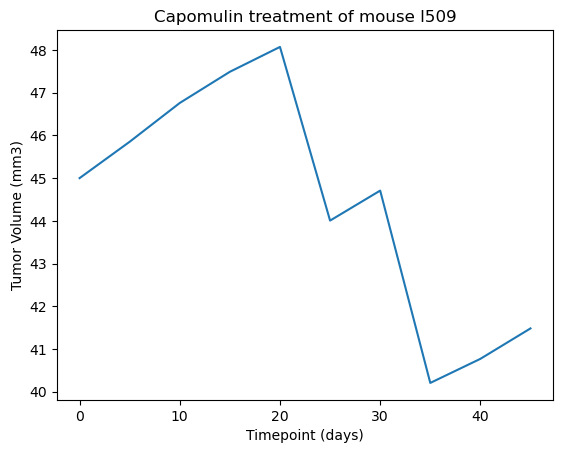

In [279]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_data = study_clean.loc[(study_clean["Drug Regimen"] == "Capomulin")]
Capomulin_data_l509 = Capomulin_data.loc[(Capomulin_data["Mouse ID"] == "l509")]
Capomulin_data_l509

line_graph = plt.plot(Capomulin_data_l509["Timepoint"], Capomulin_data_l509["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

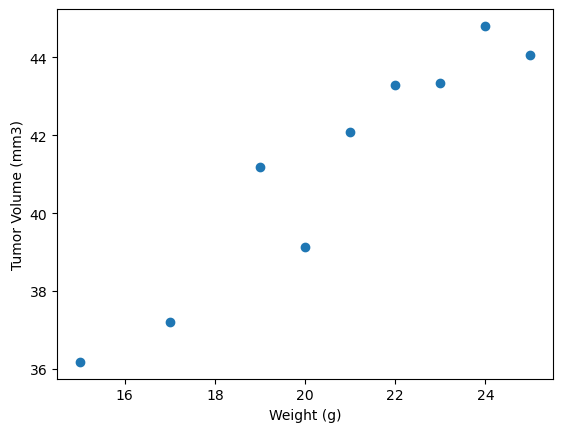

In [280]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = Capomulin_data.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

x_values = data["Weight (g)"]
y_values = data["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

In [281]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.95


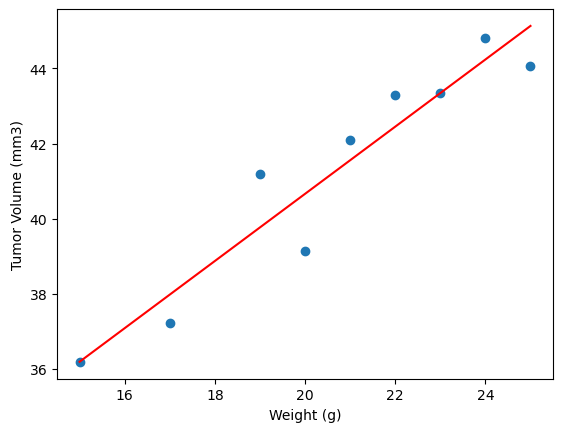

In [282]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
data = Capomulin_data.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values, y_values)[0],2)}")

plt.show()